In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
plt.style.use('seaborn')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

## LOADING GLOBAL TERRORISM DATASET

In [ ]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",  encoding = 'latin1')

In [93]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## DATA CLEANING AND EXPLORATORY DATA ANALYSIS

In [94]:
#CHECKING FOR THE NUMBER OF FEATURES
df.shape

(181691, 135)

PROCEDURE: Due to the large number of features present in the dataset, for us to see all columns and understand the feaures properly we would split the dataset into seven groups, then call the df.columns, df.nunique(), df.corr(),df.isna().sum() functions and plot the heapmap for each group. This will provide us with information regarding the redundant features that needs to be dropped.

In [95]:
#FIRST GROUP
df1 = df.iloc[:,0:21]
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1


In [96]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity',
       'location', 'summary', 'crit1', 'crit2'],
      dtype='object')

In [97]:
df1.nunique()

eventid        181691
iyear              47
imonth             13
iday               32
approxdate       2244
extended            2
resolution       1859
country           205
country_txt       205
region             12
region_txt         12
provstate        2855
city            36674
latitude        48322
longitude       48039
specificity         5
vicinity            3
location        44109
summary        112492
crit1               2
crit2               2
dtype: int64

In [98]:
#checking for missing data
df1.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
approxdate     172452
extended            0
resolution     179471
country             0
country_txt         0
region              0
region_txt          0
provstate         421
city              434
latitude         4556
longitude        4557
specificity         6
vicinity            0
location       126196
summary         66129
crit1               0
crit2               0
dtype: int64

In [99]:
#checking for missing value percentage
df1.isna().mean()

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate     0.949150
extended       0.000000
resolution     0.987781
country        0.000000
country_txt    0.000000
region         0.000000
region_txt     0.000000
provstate      0.002317
city           0.002389
latitude       0.025076
longitude      0.025081
specificity    0.000033
vicinity       0.000000
location       0.694564
summary        0.363964
crit1          0.000000
crit2          0.000000
dtype: float64

COLUMNS TO BE DROPPED DUE TO HIGH PERCENTAGE OF MISSING DATA ['approxdate','resolution','location']

In [100]:
#Group 2
df2=df.iloc[:,21:41]
df2.head()

,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1
0,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0
1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0
2,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0
3,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0
4,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0


In [101]:
df2.columns

Index(['crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1'],
      dtype='object')

In [102]:
df2.nunique()

crit3                   2
doubtterr               3
alternative             5
alternative_txt         5
multiple                2
success                 2
suicide                 2
attacktype1             9
attacktype1_txt         9
attacktype2             9
attacktype2_txt         9
attacktype3             8
attacktype3_txt         8
targtype1              22
targtype1_txt          22
targsubtype1          112
targsubtype1_txt      112
corp1               33238
target1             86006
natlty1               215
dtype: int64

In [103]:
#Checking for missing values
df2.isna().sum()

crit3                    0
doubtterr                1
alternative         152680
alternative_txt     152680
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
attacktype2         175377
attacktype2_txt     175377
attacktype3         181263
attacktype3_txt     181263
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1               1559
dtype: int64

In [104]:
#percentage of missiing data
df2.isna().mean()*100

crit3                0.000000
doubtterr            0.000550
alternative         84.032781
alternative_txt     84.032781
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
attacktype2         96.524869
attacktype2_txt     96.524869
attacktype3         99.764435
attacktype3_txt     99.764435
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
dtype: float64

COLUMNS TO BE DROPPED DUE TO HIGH PERCENTAGE OF MISSING DATA AND IRRELEVANCE OF COLUMNS ['alternative','alternative_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','targsubtype1','targsubtype1_txt']

In [105]:
#Group 3
df3=df.iloc[:,41:61]
df3.head()

,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2
0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN
1,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN
2,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
4,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN


In [106]:
df3.columns

Index(['natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname',
       'gname2'],
      dtype='object')

In [107]:
df3.nunique()

natlty1_txt          215
targtype2             22
targtype2_txt         22
targsubtype2         107
targsubtype2_txt     107
corp2               2691
target2             5043
natlty2              158
natlty2_txt          158
targtype3             20
targtype3_txt         20
targsubtype3          92
targsubtype3_txt      92
corp3                422
target3              720
natlty3              110
natlty3_txt          110
gname               3537
gsubname            1183
gname2               433
dtype: int64

In [108]:
df3.isna().sum()

natlty1_txt           1559
targtype2           170547
targtype2_txt       170547
targsubtype2        171006
targsubtype2_txt    171006
corp2               171574
target2             170671
natlty2             170863
natlty2_txt         170863
targtype3           180515
targtype3_txt       180515
targsubtype3        180594
targsubtype3_txt    180594
corp3               180665
target3             180516
natlty3             180544
natlty3_txt         180544
gname                    0
gsubname            175801
gname2              179678
dtype: int64

In [109]:
df3.isna().mean()

natlty1_txt         0.008581
targtype2           0.938665
targtype2_txt       0.938665
targsubtype2        0.941191
targsubtype2_txt    0.941191
corp2               0.944318
target2             0.939348
natlty2             0.940404
natlty2_txt         0.940404
targtype3           0.993527
targtype3_txt       0.993527
targsubtype3        0.993962
targsubtype3_txt    0.993962
corp3               0.994353
target3             0.993533
natlty3             0.993687
natlty3_txt         0.993687
gname               0.000000
gsubname            0.967582
gname2              0.988921
dtype: float64

COLUMNS TO BE DROPPED DUE TO HIGH PERCENTAGE OF MISSING DATA ['targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2']



In [110]:
#Group 4
df4=df.iloc[:,61:81]
df4.head()

,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df4.columns

Index(['gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1',
       'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap',
       'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim'],
      dtype='object')

In [112]:
df4.nunique()

gsubname2            60
gname3              116
gsubname3            14
motive            14490
guncertain1           2
guncertain2           2
guncertain3           2
individual            2
nperps              113
nperpcap             50
claimed               3
claimmode            10
claimmode_txt        10
claim2                3
claimmode2            9
claimmode2_txt        9
claim3                2
claimmode3            8
claimmode3_txt        8
compclaim             3
dtype: int64

In [113]:
df4.isna().sum()

gsubname2         181531
gname3            181367
gsubname3         181671
motive            131130
guncertain1          380
guncertain2       179736
guncertain3       181371
individual             0
nperps             71115
nperpcap           69489
claimed            66120
claimmode         162608
claimmode_txt     162608
claim2            179801
claimmode2        181075
claimmode2_txt    181075
claim3            181373
claimmode3        181558
claimmode3_txt    181558
compclaim         176852
dtype: int64

In [114]:
df4.isna().mean()

gsubname2         0.999119
gname3            0.998217
gsubname3         0.999890
motive            0.721720
guncertain1       0.002091
guncertain2       0.989240
guncertain3       0.998239
individual        0.000000
nperps            0.391406
nperpcap          0.382457
claimed           0.363915
claimmode         0.894970
claimmode_txt     0.894970
claim2            0.989598
claimmode2        0.996610
claimmode2_txt    0.996610
claim3            0.998250
claimmode3        0.999268
claimmode3_txt    0.999268
compclaim         0.973367
dtype: float64

COLUMNS TO BE DROPPED ['gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2', 'guncertain3', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim']



In [115]:
#Group 5
df5=df.iloc[:,81:101]
df5.head()

,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter
0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN
4,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN


In [116]:
df5.columns

Index(['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter'],
      dtype='object')

In [117]:
df5.nunique()

weaptype1              12
weaptype1_txt          12
weapsubtype1           30
weapsubtype1_txt       30
weaptype2              11
weaptype2_txt          11
weapsubtype2           28
weapsubtype2_txt       28
weaptype3              10
weaptype3_txt          10
weapsubtype3           22
weapsubtype3_txt       22
weaptype4               5
weaptype4_txt           5
weapsubtype4           16
weapsubtype4_txt       16
weapdetail          19148
nkill                 205
nkillus                31
nkillter               96
dtype: int64

In [118]:
df5.isna().sum()

weaptype1                0
weaptype1_txt            0
weapsubtype1         20768
weapsubtype1_txt     20768
weaptype2           168564
weaptype2_txt       168564
weapsubtype2        170149
weapsubtype2_txt    170149
weaptype3           179828
weaptype3_txt       179828
weapsubtype3        179998
weapsubtype3_txt    179998
weaptype4           181618
weaptype4_txt       181618
weapsubtype4        181621
weapsubtype4_txt    181621
weapdetail           67670
nkill                10313
nkillus              64446
nkillter             66958
dtype: int64

In [119]:
df5.isna().mean()

weaptype1           0.000000
weaptype1_txt       0.000000
weapsubtype1        0.114304
weapsubtype1_txt    0.114304
weaptype2           0.927751
weaptype2_txt       0.927751
weapsubtype2        0.936475
weapsubtype2_txt    0.936475
weaptype3           0.989746
weaptype3_txt       0.989746
weapsubtype3        0.990682
weapsubtype3_txt    0.990682
weaptype4           0.999598
weaptype4_txt       0.999598
weapsubtype4        0.999615
weapsubtype4_txt    0.999615
weapdetail          0.372446
nkill               0.056761
nkillus             0.354701
nkillter            0.368527
dtype: float64

COLUMNS TO BE DROPPED [ 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt']



In [120]:
#GROUP 6
df6 = df.iloc[:,101:121]
df6.head()

,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN
2,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [121]:
df6.columns


Index(['nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
       'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus'],
      dtype='object')

In [122]:
df6.isna().sum()

nwound             16311
nwoundus           64702
nwoundte           69143
property               0
propextent        117626
propextent_txt    117626
propvalue         142702
propcomment       123732
ishostkid            178
nhostkid          168119
nhostkidus        168174
nhours            177628
ndays             173567
divert            181367
kidhijcountry     178386
ransom            104310
ransomamt         180341
ransomamtus       181128
ransompaid        180917
ransompaidus      181139
dtype: int64

In [123]:
df6.isna().mean()*100

nwound             8.977330
nwoundus          35.611010
nwoundte          38.055270
property           0.000000
propextent        64.739585
propextent_txt    64.739585
propvalue         78.541039
propcomment       68.100236
ishostkid          0.097969
nhostkid          92.530175
nhostkidus        92.560446
nhours            97.763786
ndays             95.528672
divert            99.821675
kidhijcountry     98.180978
ransom            57.410659
ransomamt         99.256980
ransomamtus       99.690133
ransompaid        99.574002
ransompaidus      99.696187
dtype: float64

COLUMNS TO BE DROPPED ['propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus']



In [124]:
#GROUP 7
df7 = df.iloc[:,121:136]
df7.head()

,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [125]:
df7.columns

Index(['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object')

In [126]:
df7.isna().sum()

ransomnote            181177
hostkidoutcome        170700
hostkidoutcome_txt    170700
nreleased             171291
addnotes              153402
scite1                 66191
scite2                104758
scite3                138175
dbsource                   0
INT_LOG                    0
INT_IDEO                   0
INT_MISC                   0
INT_ANY                    0
related               156653
dtype: int64

In [127]:
df7.isna().mean()*100

ransomnote            99.717102
hostkidoutcome        93.950719
hostkidoutcome_txt    93.950719
nreleased             94.275996
addnotes              84.430159
scite1                36.430533
scite2                57.657231
scite3                76.049447
dbsource               0.000000
INT_LOG                0.000000
INT_IDEO               0.000000
INT_MISC               0.000000
INT_ANY                0.000000
related               86.219461
dtype: float64

COLUMNS TO BE DROPPED ['ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite2', 'scite3', 'related']



In [128]:
#DROPPING ALL COLUMNS WITH PERCENTAGE OF MISSING DATA
df=df.drop(columns=['approxdate','resolution','location','alternative','alternative_txt','attacktype2','attacktype2_txt',
                    'attacktype3','attacktype3_txt','targsubtype1','targsubtype1_txt','targtype2','targtype2_txt','targsubtype2',
                   'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
                     'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
                    'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname',
                     'gname2','gsubname2', 'gname3', 'gsubname3', 'motive',
                     'guncertain2', 'guncertain3',
                      'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
                      'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
                      'compclaim','weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
                     'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
                     'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt','propextent',
                     'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
                     'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
                    'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus','ransomnote', 'hostkidoutcome', 
                    'hostkidoutcome_txt', 
                    'nreleased', 'addnotes', 'scite2', 'scite3', 'related'])

In [129]:
df.shape

(181691, 55)

In [130]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [131]:
#Checking for missing values
df.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
weaptype1               0
weaptype1_txt           0
weapsubtype1

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [133]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
#CHECKING FOR NUMBER OF ELEMENTS IN EACH UNIQUE FEATURE
df.nunique()

eventid             181691
iyear                   47
imonth                  13
iday                    32
extended                 2
country                205
country_txt            205
region                  12
region_txt              12
provstate             2855
city                 36674
latitude             48322
longitude            48039
specificity              5
vicinity                 3
summary             112492
crit1                    2
crit2                    2
crit3                    2
doubtterr                3
multiple                 2
success                  2
suicide                  2
attacktype1              9
attacktype1_txt          9
targtype1               22
targtype1_txt           22
corp1                33238
target1              86006
natlty1                215
natlty1_txt            215
gname                 3537
guncertain1              2
individual               2
nperps                 113
nperpcap                50
weaptype1               12
w

TREATING MISSING VALUES

In [135]:
#TREATING FOR MISSING VALUES WITH OBJECT AS DATA TYPE
df['provstate'].fillna('Unknown',inplace=True)
df['city'].fillna('Unknown',inplace=True)
df['summary'].fillna('Unknown',inplace=True)
df['corp1'].fillna('Unknown',inplace=True)
df['target1'].fillna('Unknown',inplace=True)
df['natlty1_txt'].fillna('Unknown',inplace=True)
df['weapsubtype1_txt'].fillna('Unknown',inplace=True)
df['weapdetail'].fillna('Unknown',inplace=True)
df['scite1'].fillna('Unknown',inplace=True)

In [136]:
#TREATING FOR MISSING VALUES WITH FLOAT/INT AS DATA TYPE
#The following features will be treated my filling with their median values due to the features having high values as standard deviation compared to their mean values
df['latitude'].fillna(value=df['latitude'].median(), inplace=True)
df['longitude'].fillna(value=df['longitude'].median(), inplace=True)
df['specificity'].fillna(value=df['specificity'].median(), inplace=True)
df['doubtterr'].fillna(value=df['doubtterr'].median(), inplace=True)
df['multiple'].fillna(value=df['multiple'].median(), inplace=True)
df['natlty1'].fillna(value=df['natlty1'].median(), inplace=True)
df['guncertain1'].fillna(value=df['guncertain1'].median(), inplace=True)
df['nperps'].fillna(value=df['nperps'].median(), inplace=True)
df['nperpcap'].fillna(value=df['nperpcap'].median(), inplace=True)
df['weapsubtype1'].fillna(value=df['weapsubtype1'].median(), inplace=True)
df['nkill'].fillna(value=df['nkill'].median(), inplace=True)
df['nkillus'].fillna(value=df['nkillus'].median(), inplace=True)
df['nkillter'].fillna(value=df['nkillter'].median(), inplace=True)
df['nwound'].fillna(value=df['nwound'].median(), inplace=True)
df['nwoundus'].fillna(value=df['nwoundus'].median(), inplace=True)
df['nwoundte'].fillna(value=df['nwoundte'].median(), inplace=True)
df['ishostkid'].fillna(value=df['ishostkid'].median(), inplace=True)

In [137]:
df.isna().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
summary             0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
guncertain1         0
individual          0
nperps              0
nperpcap            0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
weapdetail          0
nkill               0
nkillus             0
nkillter            0
nwound              0
nwoundus  

In [138]:
#creating new dataset with selected columns based on column description and intended problem statement
clean_df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','individual','natlty1_txt','gname','weaptype1_txt','nkill']]

clean_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','natlty1_txt':'Nationality_target','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
clean_df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,individual,Nationality_target,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,0,Dominican Republic,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),0,Belgium,23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,0,United States,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),0,United States,Unknown,Explosives,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),0,United States,Unknown,Incendiary,0.0


In [139]:
#Check Missing Values
def check_missing(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

In [140]:
check_missing(clean_df)

,Total,Percent
Year,0,0.0
Month,0,0.0
Day,0,0.0
Extended,0,0.0
Country,0,0.0
Region,0,0.0
City,0,0.0
Success,0,0.0
Suicide,0,0.0
Attack_Type,0,0.0


In [141]:
#CHECKING FOR THE NUMBER OF UNIQUE ELEMENTS ON THE FEATURES
clean_df.nunique()

Year                     47
Month                    13
Day                      32
Extended                  2
Country                 205
Region                   12
City                  36674
Success                   2
Suicide                   2
Attack_Type               9
Target_Type              22
individual                2
Nationality_target      216
Attack_Group           3537
Weapon                   12
Number_of_Killed        205
dtype: int64

In [142]:
#CHECKING TO SEE THE STATISTICS ON THE DATASET
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,181691.0,2002.638997,13.259430,1970.0,1991.0,2009.0,2014.0,2017.0
Month,181691.0,6.467277,3.388303,0.0,4.0,6.0,9.0,12.0
Day,181691.0,15.505644,8.814045,0.0,8.0,15.0,23.0,31.0
Extended,181691.0,0.045346,0.208063,0.0,0.0,0.0,0.0,1.0
Success,181691.0,0.889598,0.313391,0.0,1.0,1.0,1.0,1.0
Suicide,181691.0,0.036507,0.187549,0.0,0.0,0.0,0.0,1.0
individual,181691.0,0.002950,0.054234,0.0,0.0,0.0,0.0,1.0
Number_of_Killed,181691.0,2.266860,11.227057,0.0,0.0,0.0,2.0,1570.0


In [143]:
#checking the relationship between the features
clean_df.corr()

,Year,Month,Day,Extended,Success,Suicide,individual,Number_of_Killed
Year,1.000000,0.000139,0.018254,0.091754,-0.082963,0.137736,0.017944,0.021252
Month,0.000139,1.000000,0.005497,-0.000468,-0.002845,0.003071,-0.001661,0.004031
Day,0.018254,0.005497,1.000000,-0.004700,-0.011802,0.003593,-0.003788,-0.003225
Extended,0.091754,-0.000468,-0.004700,1.000000,0.073233,-0.033961,-0.008929,0.014586
Success,-0.082963,-0.002845,-0.011802,0.073233,1.000000,-0.031155,-0.013868,0.049619
Suicide,0.137736,0.003071,0.003593,-0.033961,-0.031155,1.000000,0.000775,0.136385
individual,0.017944,-0.001661,-0.003788,-0.008929,-0.013868,0.000775,1.000000,-0.001275
Number_of_Killed,0.021252,0.004031,-0.003225,0.014586,0.049619,0.136385,-0.001275,1.000000


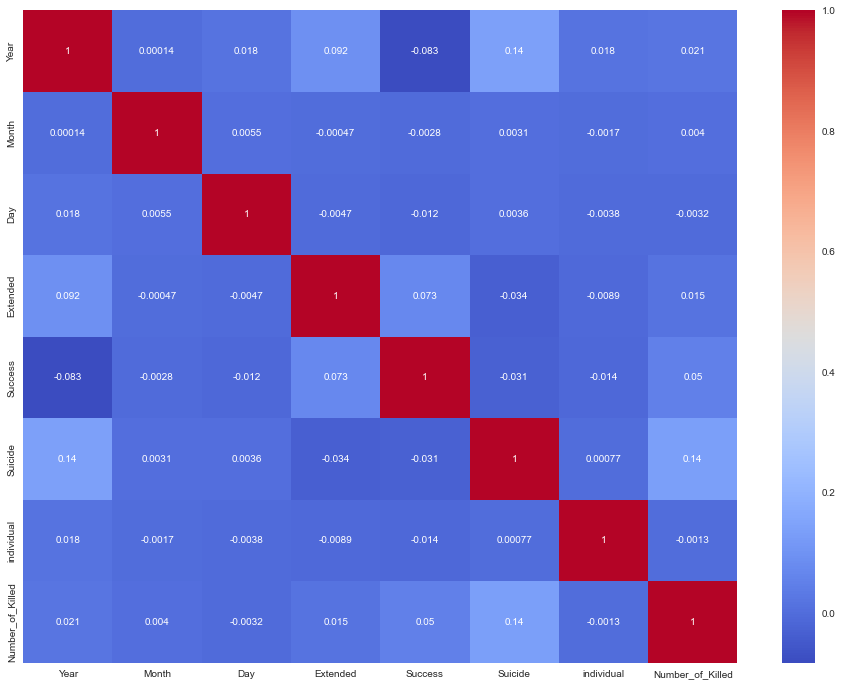

In [144]:
plt.figure(figsize=(16,12))
sns.heatmap(clean_df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

## DATA VISUALIZATION


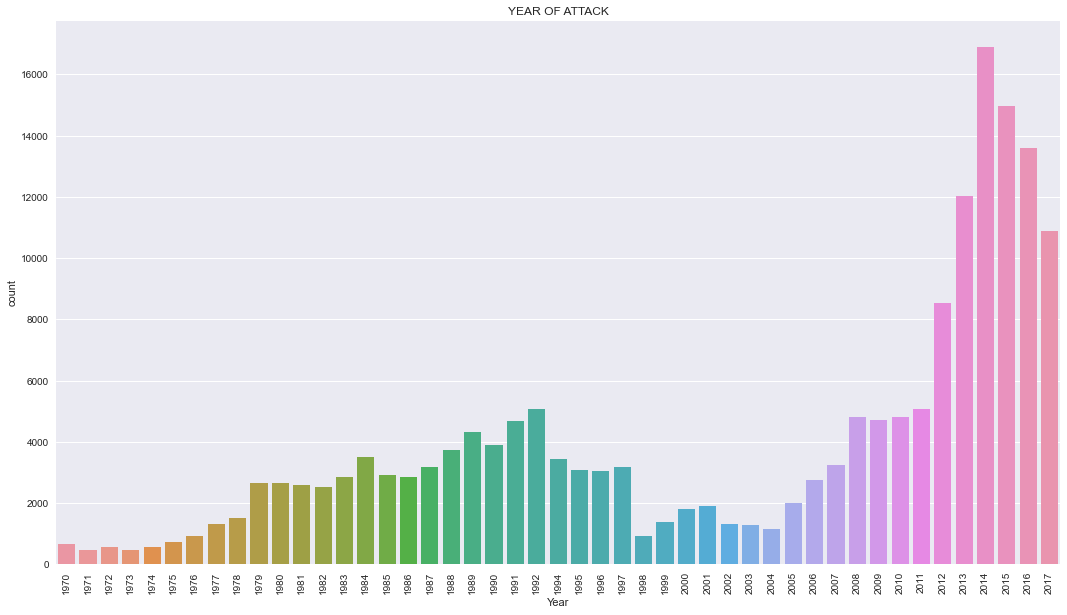

In [145]:
#YEAR
plt.figure(figsize=(18,10))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Year'].sort_values(), data= df)
plt.title('YEAR OF ATTACK')
plt.show()

FROM THE CHART WE CAN SEE AS THE YEAR GOES BY THE RATE OF GLOBAL TERRORISM INCREASED WITH YEAR 2014 RECORDING THE HIGHEST RATE OF GLOBAL TERRORISM WHILE YEAR 1971 WITH THE LEAST RECORDED GLOBAL TERRORISM

In [146]:
#COUNTRY
country = pd.DataFrame(clean_df.groupby('Country')['Country'].size().sort_values(ascending=False))
country.columns = ['Count']
country_df = country.head(20)
country_df

,Count
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


Iraq,Pakistan,Afghanistan lead as the countries with the highest reported cases of global terrorism



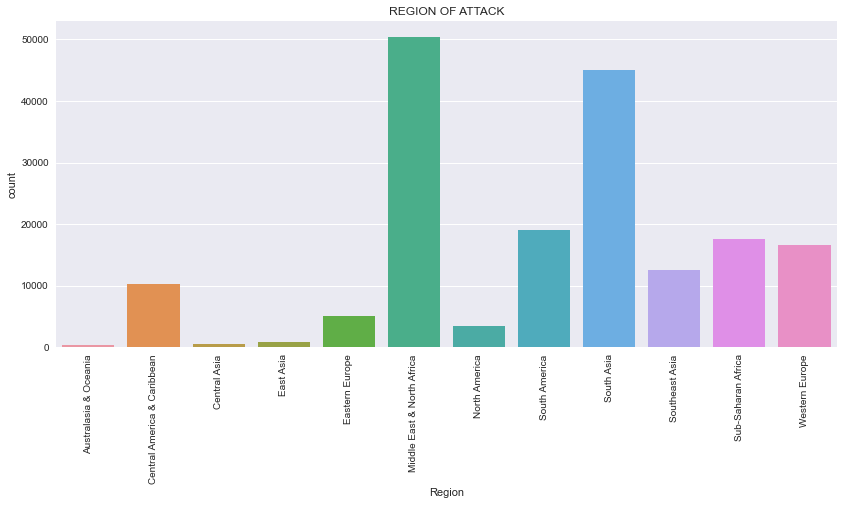

In [147]:
#REGION
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Region'].sort_values(), data= df)
plt.title('REGION OF ATTACK')
plt.show()

The regions with the most occurence of global terrorism are Middle East& North Africa and South Asia While Australasia and Oceania is the least region with terrorism attack



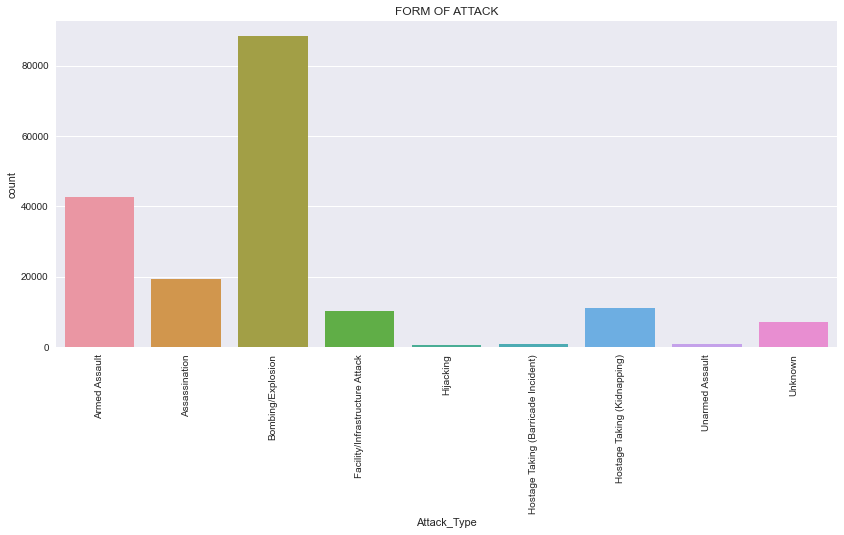

In [148]:
#ATTACK TYPE
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Attack_Type'].sort_values(), data= df)
plt.title('FORM OF ATTACK')
plt.show()

The predominant form of attack in global terrorism has been carried out by the use of Bombing/Explosion followed by Armed Assault #While Hijacking has been the least form used



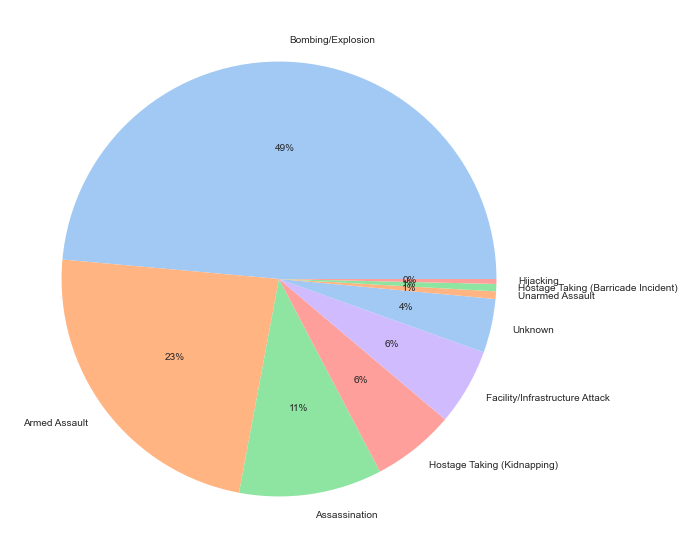

In [149]:
#Pie chart for attack type data
attack = pd.DataFrame(clean_df.groupby('Attack_Type')['Attack_Type'].size().sort_values(ascending=False))
attack.columns = ['Count']

labels = list(attack.index)
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(10,10))
plt.pie(attack['Count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


The predominant form of attack in global terrorism has been carried out by the use of Bombing/Explosion (49%) followed by Armed Assault While Hijacking has been the least form used



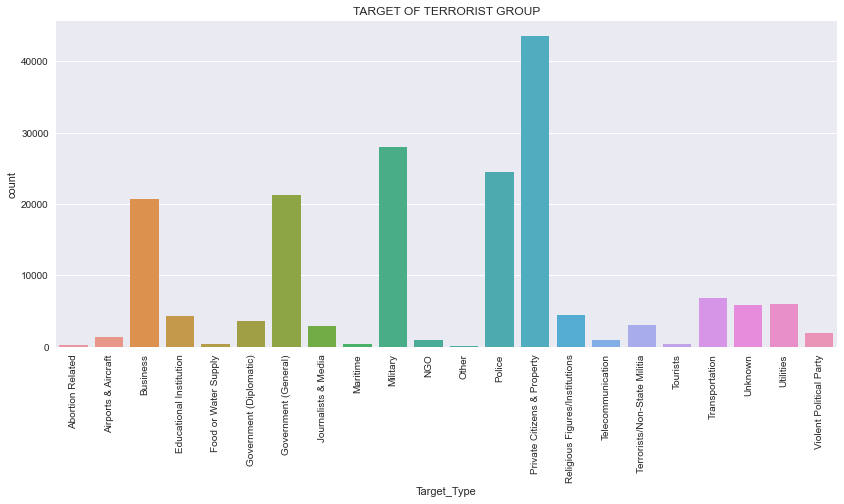

In [150]:
#Target Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Target_Type'].sort_values(), data= df)
plt.title('TARGET OF TERRORIST GROUP')
plt.show()

The most targeted area of global terrorism has been Private Citizens & Property followed by the Military and the Police



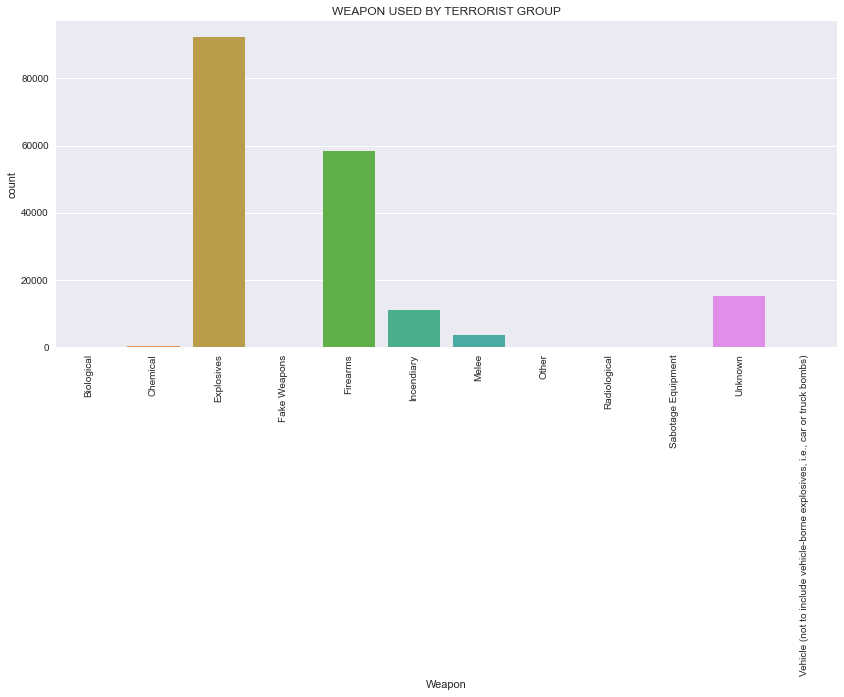

In [151]:
#Weapon Type
plt.figure(figsize=(14,6))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Weapon'].sort_values(), data= df)
plt.title('WEAPON USED BY TERRORIST GROUP')
plt.show()

Explosives and firearms constitute the most weapon used in global terrorism

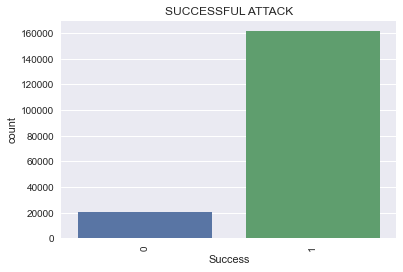

In [152]:
#Success in Attack
plt.figure(figsize=(6,4))
plb.xticks(rotation= 90)
plot1 = sns.countplot(x= clean_df['Success'].sort_values(), data= df)
plt.title('SUCCESSFUL ATTACK')
plt.show()


In [153]:
#Deaths Toll
No_Deaths = pd.DataFrame(clean_df.groupby('Number_of_Killed')['Region'].size().sort_values(ascending=True))
No_Deaths.columns = ['Count']
No_Deaths_df = No_Deaths.head(20)
No_Deaths_df

,Count
Number_of_Killed,
1570.0,1
212.0,1
210.0,1
208.0,1
205.0,1
188.0,1
184.0,1
171.0,1
168.0,1


The highest record of death during an attack has the 1570



In [154]:
No_deaths=pd.DataFrame(clean_df.groupby("Region")["Number_of_Killed"].size().sort_values(ascending=True))
No_deaths_df=No_deaths.tail(10)
No_deaths_df

,Number_of_Killed
Region,
East Asia,802
North America,3456
Eastern Europe,5144
Central America & Caribbean,10344
Southeast Asia,12485
Western Europe,16639
Sub-Saharan Africa,17550
South America,18978
South Asia,44974


Middle East& North Afican has recorded more cases of deaths from global terrorism followed by South Asia this also shows that the regions has had the highest occurence of global terrorism



In [155]:
#clean dataset wthout preprocessing
clean_df.to_csv('clean_df.csv')

In [156]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Extended            181691 non-null  int64  
 4   Country             181691 non-null  object 
 5   Region              181691 non-null  object 
 6   City                181691 non-null  object 
 7   Success             181691 non-null  int64  
 8   Suicide             181691 non-null  int64  
 9   Attack_Type         181691 non-null  object 
 10  Target_Type         181691 non-null  object 
 11  individual          181691 non-null  int64  
 12  Nationality_target  181691 non-null  object 
 13  Attack_Group        181691 non-null  object 
 14  Weapon              181691 non-null  object 
 15  Number_of_Killed    181691 non-nul

## STEP 2: FEATURE ENGINEERING (FEATURE SELECTION AND FEATURE SCALING)

## Encoding data


In [157]:
dff = clean_df.copy()

In [158]:
X=dff.drop(['Success','City'],axis=1)
y=dff['Success']

In [159]:
from sklearn.ensemble import ExtraTreesClassifier
tree=ExtraTreesClassifier(n_estimators=10)
tree.fit(X,y)
feat_imp=pd.Series(tree.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show() 

ValueError: could not convert string to float: 'Dominican Republic'

In [160]:
cat_cols=['Attack_Group','Weapon','Country','Region','Attack_Type','Target_Type', 'Nationality_target']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cat_cols:
     X[col] = le.fit_transform(X[col])


# Split dataset into a training and testing set.


In [161]:
# Split dataset into a training and testing set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=2)

In [162]:
print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

ros = RandomOverSampler (random_state=2)
X_train, y_train = ros.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [ 13938 113245]

Number of observations in the target variable after oversampling of the minority class: [113245 113245]


## STEP 3: MODEL BUILDING AND SELECTION

### BUILDING A MODELLING PROCESS TO PREDICT IF A TERRORIST ATTACK IS GOING TO BE SUCCESSFUL


### LOGISTIC REGRESSION


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
lr_model=LogisticRegression()
pipe=make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('LR train score is:', pipe.score(X_train,y_train))
print('LR test score is:', pipe.score(X_test,y_test))

LR train score is: 0.6194004150293612
LR test score is: 0.5630549644088941


In [167]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 4307  1814]
 [22003 26384]]
Classification report : 
               precision    recall  f1-score   support

           0       0.16      0.70      0.27      6121
           1       0.94      0.55      0.69     48387

    accuracy                           0.56     54508
   macro avg       0.55      0.62      0.48     54508
weighted avg       0.85      0.56      0.64     54508



In [165]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [166]:
print('MSE:', mean_squared_error(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('r2_score:', r2_score(y_test,y_pred))

MSE: 0.43694503559110587
MAE: 0.43694503559110587
r2_score: -3.3832498617455986


## KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[ 4204  1917]
 [15018 33369]]


In [93]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Outcome values : 
 4204 1917 15018 33369
Classification report : 
               precision    recall  f1-score   support

           0       0.22      0.69      0.33      6121
           1       0.95      0.69      0.80     48387

    accuracy                           0.69     54508
   macro avg       0.58      0.69      0.56     54508
weighted avg       0.86      0.69      0.75     54508



In [94]:
from sklearn.metrics import accuracy_score
print('KNN Train Score is : ' , knn.score(X_train, y_train))
print('KNN Test Score is : ' , knn.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('KNN Model accuracy is: ', accuracy)

KNN Train Score is :  0.8604574153384256
KNN Test Score is :  0.6893116606736626
KNN Model accuracy is:  0.6893116606736626


## RANDOM FOREST CLASSIFIER

In [97]:
from sklearn.ensemble import RandomForestClassifier
rcr=RandomForestClassifier(random_state=42)
rcr.fit(X_train,y_train)
y_pred=rcr.predict(X_test)

matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 3353  2768]
 [ 1637 46750]]
Outcome values : 
 3353 2768 1637 46750
Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.55      0.60      6121
           1       0.94      0.97      0.96     48387

    accuracy                           0.92     54508
   macro avg       0.81      0.76      0.78     54508
weighted avg       0.91      0.92      0.92     54508



In [98]:
print('RF Train Score is : ' , rcr.score(X_train, y_train))
print('RF Test Score is : ' , rcr.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('RF Model accuracy is: ', accuracy)


RF Train Score is :  0.997377367654201
RF Test Score is :  0.9191861745064944
RF Model accuracy is:  0.9191861745064944


## GRADIENTBOOST CLASSIFIER

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth=5,random_state=42) 
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)
print('Predicted Value for GradientBoosting is : ' , y_pred[:2])
print('Prediction Probabilities Value for GradientBoosting is : ' , y_pred_prob[:5])
matrix = confusion_matrix(y_test,y_pred)
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,y_pred).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Predicted Value for GradientBoosting is :  [1 1]
Prediction Probabilities Value for GradientBoosting is :  [[0.17648945 0.82351055]
 [0.04469377 0.95530623]
 [0.31238146 0.68761854]
 [0.0321371  0.9678629 ]
 [0.04911706 0.95088294]]
Confusion matrix : 
 [[ 4809  1312]
 [ 8832 39555]]
Outcome values : 
 4809 1312 8832 39555
Classification report : 
               precision    recall  f1-score   support

           0       0.35      0.79      0.49      6121
           1       0.97      0.82      0.89     48387

    accuracy                           0.81     54508
   macro avg       0.66      0.80      0.69     54508
weighted avg       0.90      0.81      0.84     54508



In [100]:
print('GradientBoosting Train Score is : ' , gb.score(X_train, y_train))
print('GradientBoosting Test Score is : ' , gb.score(X_test, y_test))
accuracy = accuracy_score(y_test, y_pred)
print('GradientBoosting Model accuracy is: ', accuracy)

GradientBoosting Train Score is :  0.8174268179610579
GradientBoosting Test Score is :  0.8138988772290306
GradientBoosting Model accuracy is:  0.8138988772290306


In [105]:
### Create a Pickle file
import joblib
classifier = 'classifier.pkl'
joblib.dump(classifier, classifier)

['classifier.pkl']